# BANK CUSTOMERS CHURN PREDICTION


Bank customer churn refers to the phenomenon of customers discontinuing their relationship with a bank or switching to another bank. Churn is a concern for banks because acquiring new customers is typically more expensive than retaining existing ones. Understanding the factors that contribute to customer churn can help banks implement strategies to reduce churn rates and retain valuable customers.

Several factors can contribute to bank customer churn, including:

Customer dissatisfaction: Dissatisfaction with the bank's services, fees, customer service, or overall experience can lead customers to switch banks.

Better offers from competitors: Customers may be enticed by better interest rates, lower fees, or more attractive services offered by other banks.

Life events or financial changes: Major life events such as moving to a new location, getting married, or changes in financial circumstances can prompt customers to reassess their banking needs and switch banks.

Lack of personalized services: Customers may feel that their bank does not understand or meet their individual needs, leading them to seek out banks that offer more personalized services.

Technological advancements: Banks that fail to keep up with technological advancements may lose customers to more innovative banks that offer convenient digital banking solutions.

To mitigate customer churn, banks can take the following steps:

Enhance customer experience: Improving the overall customer experience, including better customer service, streamlined processes, and personalized interactions, can help build loyalty and reduce churn.

Offer competitive products and services: Banks should regularly assess and update their product and service offerings to remain competitive and attract and retain customers.

Implement customer retention programs: Loyalty programs, rewards, and incentives can encourage customers to stay with the bank and discourage them from switching to competitors.

Leverage data and analytics: Banks can analyze customer data to identify patterns and early indicators of churn. This information can be used to proactively reach out to at-risk customers and offer tailored solutions.

Embrace digital banking: Investing in digital banking platforms, mobile apps, and innovative technologies can enhance convenience and accessibility for customers, improving their satisfaction and reducing the likelihood of churn.

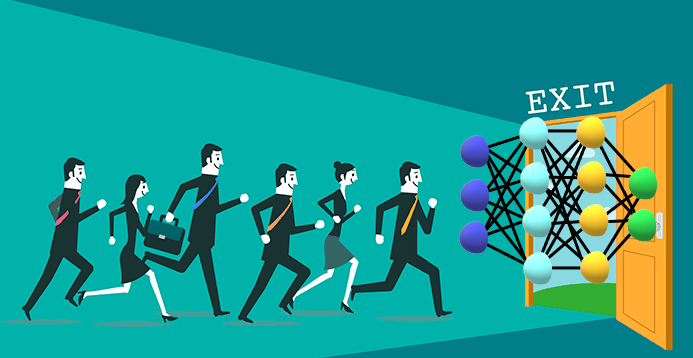

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Bank Customers Churn Prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# DATA ANALYSIS

In [8]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

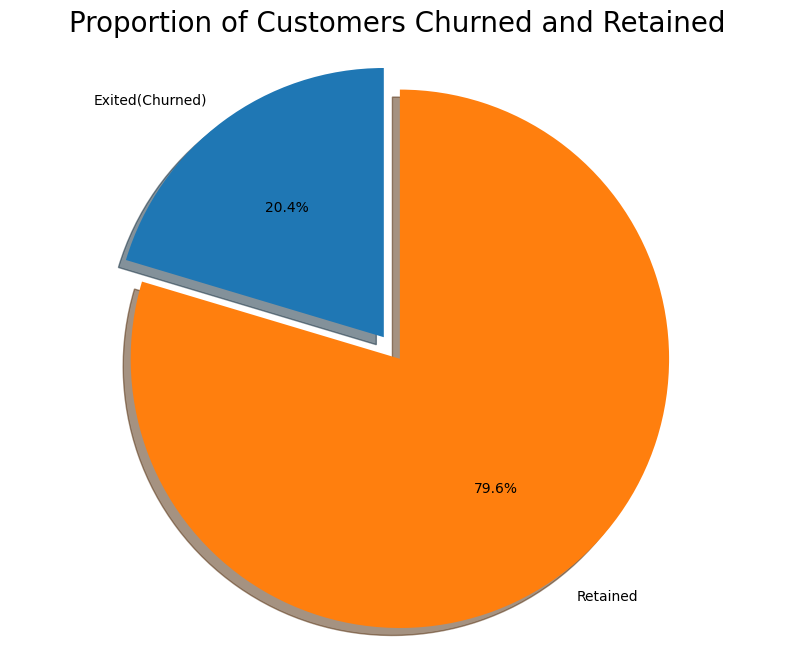

In [9]:
labels = 'Exited(Churned)','Retained'
sizes = [df.Exited[df['Exited']==1].count(),df.Exited[df['Exited']==0].count()]
explode = (0,0.1)
fig1,ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes , explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.title('Proportion of Customers Churned and Retained',size=20)
plt.show()

In [10]:
import seaborn as sns

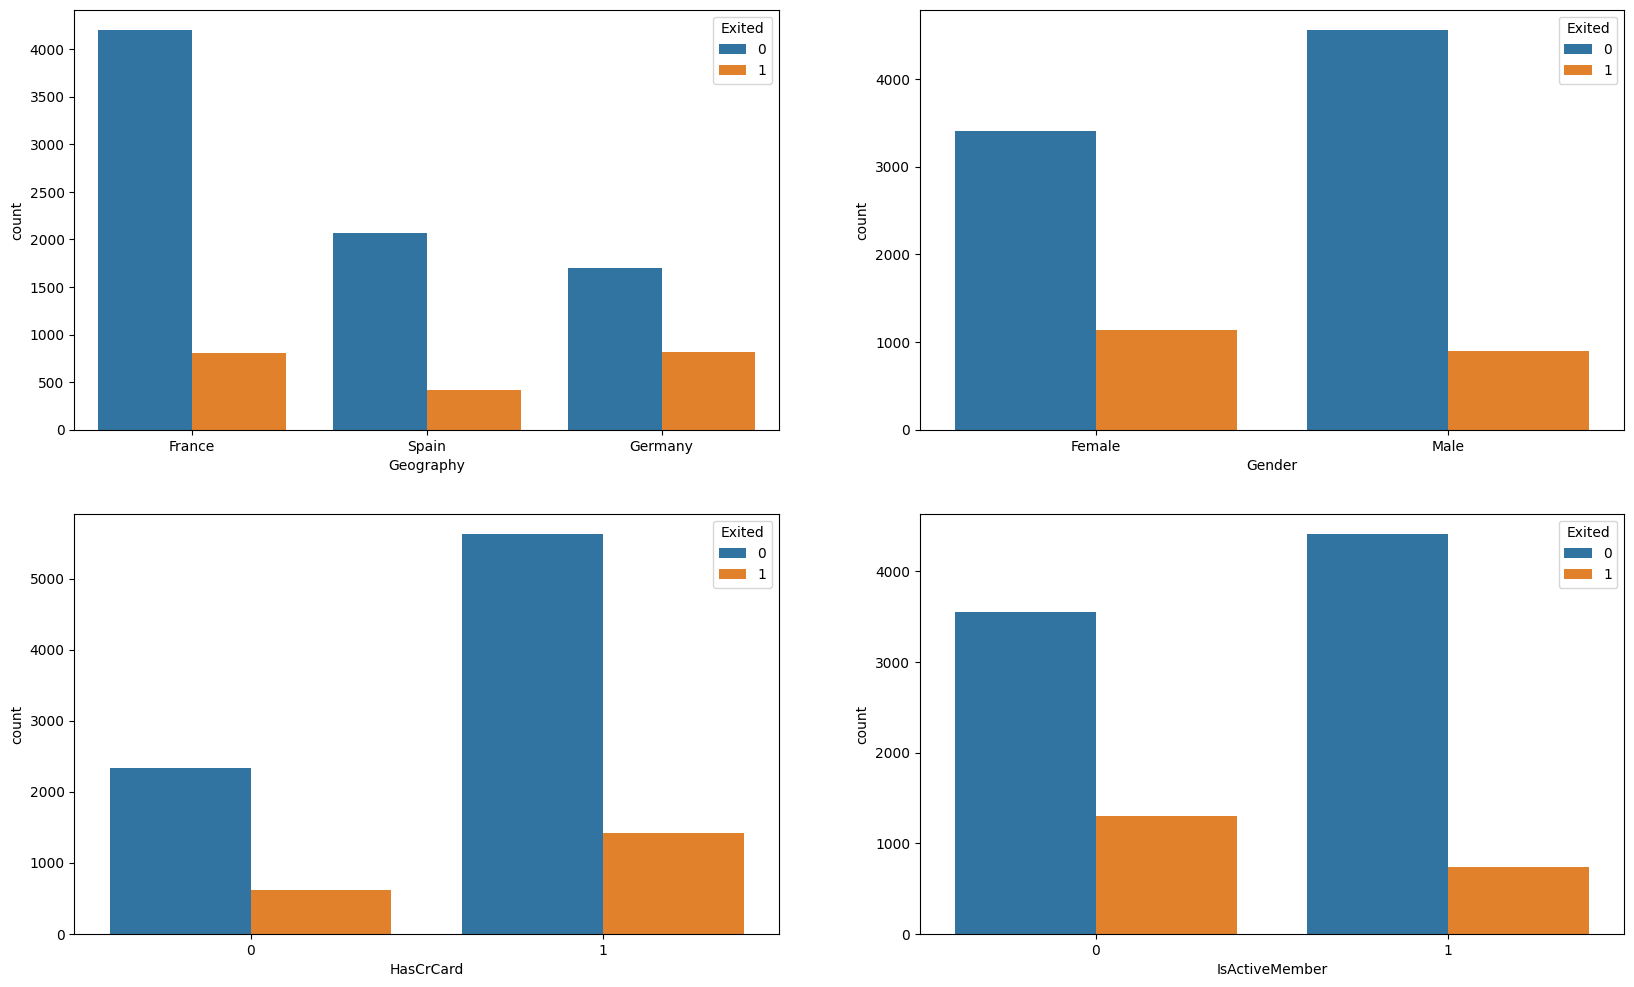

In [11]:
fig , axarr = plt.subplots(2,2,figsize=(20,12))
sns.countplot(data=df,x='Geography',hue='Exited',ax=axarr[0][0])
sns.countplot(data=df,x='Gender',hue='Exited',ax=axarr[0][1])
sns.countplot(data=df,x='HasCrCard',hue='Exited',ax=axarr[1][0])
sns.countplot(data=df,x='IsActiveMember',hue='Exited',ax=axarr[1][1])
plt.show()


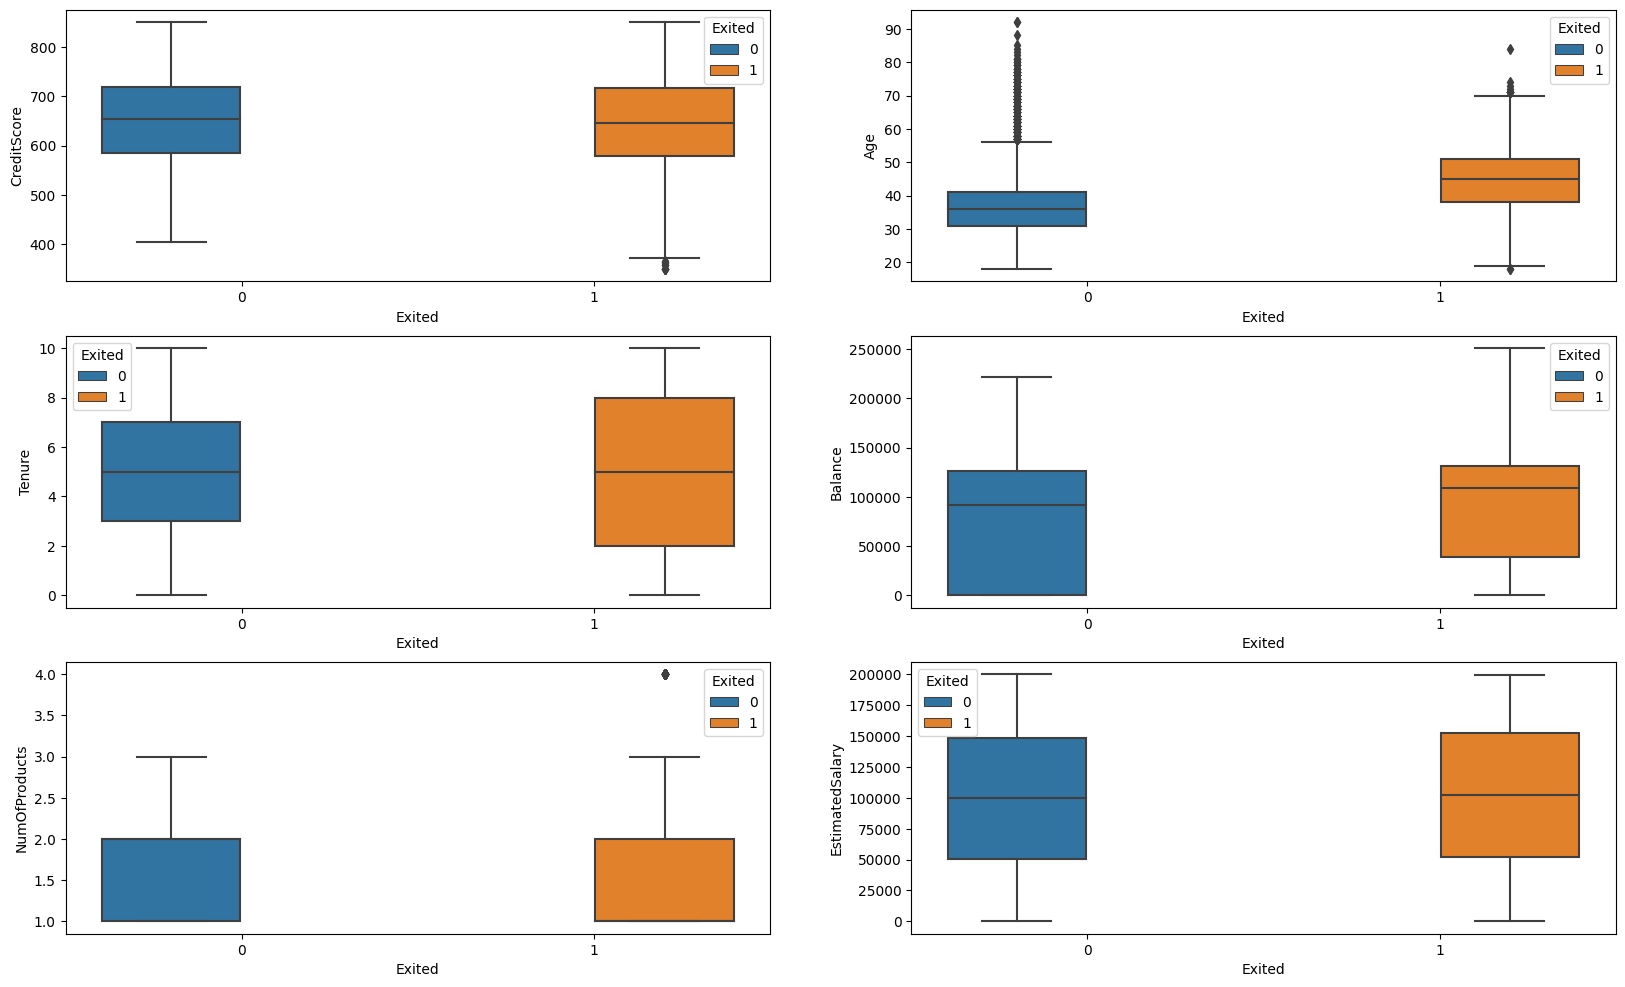

In [12]:
fig ,ax = plt.subplots(3,2,figsize=(20,12))
sns.boxplot(data=df,x='Exited',y='CreditScore',hue='Exited',ax=ax[0][0])
sns.boxplot(data=df,x='Exited',y='Age',hue='Exited',ax=ax[0][1])
sns.boxplot(data=df,x='Exited',y='Tenure',hue='Exited',ax=ax[1][0])
sns.boxplot(data=df,x='Exited',y='Balance',hue='Exited',ax=ax[1][1])
sns.boxplot(data=df,x='Exited',y='NumOfProducts',hue='Exited',ax=ax[2][0])
sns.boxplot(data=df,x='Exited',y='EstimatedSalary',hue='Exited',ax=ax[2][1])
plt.show()

# Feature Engineering

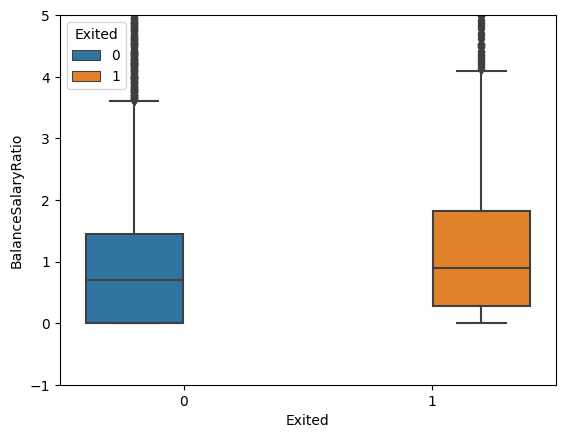

In [13]:
df['BalanceSalaryRatio'] = df.Balance / df.EstimatedSalary
sns.boxplot(data=df,x='Exited',y='BalanceSalaryRatio',hue='Exited')
plt.ylim(-1,5)
plt.show()




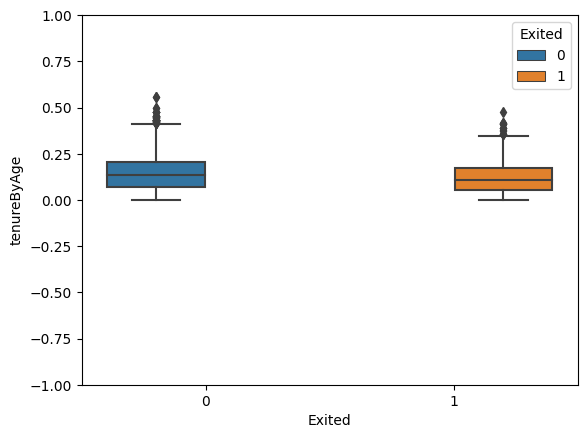

In [14]:
df['tenureByAge'] = df.Tenure / df.Age
sns.boxplot(data=df,x='Exited',y='tenureByAge',hue='Exited')
plt.ylim(-1,1)

plt.show()

In [15]:
def cat_col(df):
  for col in df:
    if df[col].dtypes =='object':
      print(f'{col}: {df[col].unique()}')

In [16]:
cat_col(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [17]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [18]:
df1 = pd.get_dummies(data=df,columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,tenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  BalanceSalaryRatio  10000 non-null  float64
 11  tenureByAge         10000 non-null  float64
 12  Geography_France    10000 non-null  uint8  
 13  Geography_Germany   10000 non-null  uint8  
 14  Geography_Spain     10000 non-null  uint8  
dtypes: float64(4), int64(8), uint8(3)
memory usage: 966.9 

In [20]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [21]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,tenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


Train Test Split

In [22]:
X = df1.drop(['Exited'],axis=1)
Y = df1['Exited']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 14), (2000, 14), (8000,), (2000,))

# The Sequential Model

In [25]:
# x_train = np.random.random((8000, 14))  # Example random input training data
# y_train = np.random.randint(2, size=(8000, 1))  # Example random target training data


In [26]:
x_train.shape

(8000, 14)

In [27]:
df1.shape

(10000, 15)

In [28]:
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential


In [29]:
model = Sequential()
model.add(Dense(12,activation='relu',input_shape=(14,)))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                180       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
hist = model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5395 - accuracy: 0.7839
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7946
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7936
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7943
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8010
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8110
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.8149
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8240
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8296
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3871 - accura

In [33]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8475


[0.37325048446655273, 0.8475000262260437]

In [34]:
yp = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [35]:
yp

array([[0.02921076],
       [0.03954018],
       [0.04390761],
       ...,
       [0.01177196],
       [0.01758502],
       [0.0653815 ]], dtype=float32)

In [36]:
y_pred = []
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
    

In [38]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.77      0.36      0.49       405

    accuracy                           0.85      2000
   macro avg       0.81      0.66      0.70      2000
weighted avg       0.84      0.85      0.82      2000



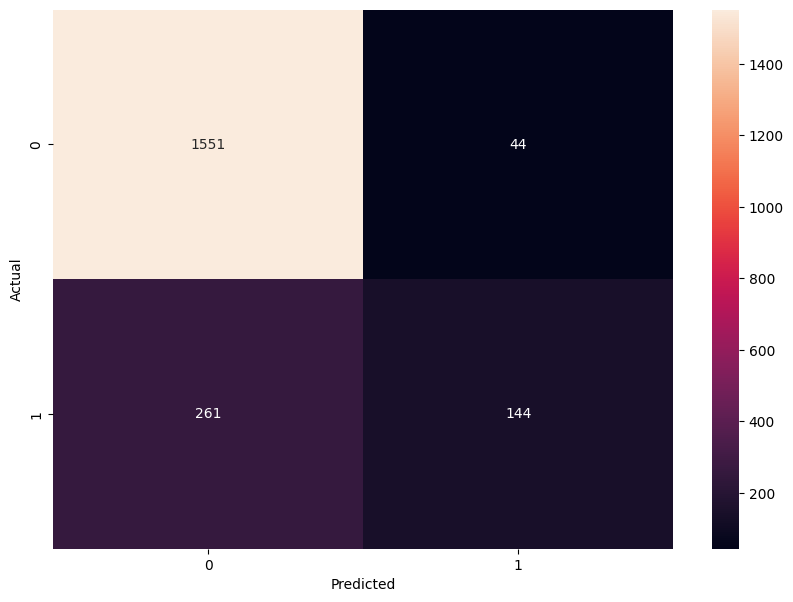

In [41]:
# Confusion matrix

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
acc_score = accuracy_score(y_test,y_pred)

In [46]:
acc_score*100

84.75

# Using AUTO ML(H2O)

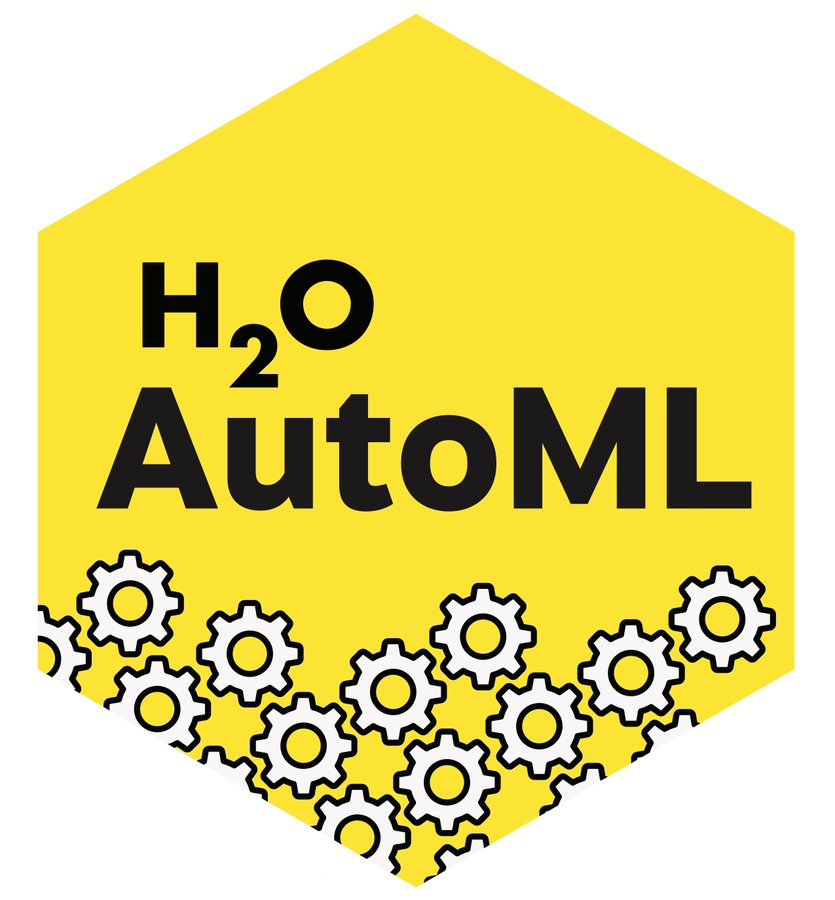

H2O is an open-source machine learning platform that provides a scalable and distributed environment for building and deploying machine learning models. It is designed to handle large datasets and complex algorithms efficiently.

H2O provides an easy-to-use interface for data scientists and machine learning practitioners to develop models using various algorithms such as generalized linear models, gradient boosting machines, random forests, deep learning, and more. It supports both supervised and unsupervised learning tasks.

Some key features of H2O include:

Scalability: H2O is designed to handle big data and can distribute computations across a cluster of machines, allowing for parallel processing and faster model training.

Automated Machine Learning (AutoML): H2O provides an AutoML functionality that automates the process of model selection and hyperparameter tuning. It automatically explores various algorithms and hyperparameter combinations to find the best model for a given dataset.

Integration: H2O can be integrated with popular programming languages such as Python, R, and Java, making it accessible to a wide range of users. It also integrates with other machine learning and data processing frameworks like TensorFlow, Apache Spark, and Hadoop.

Model Deployment: H2O allows you to export trained models for deployment in production environments. It provides APIs and libraries for scoring new data using the trained models.

H2O is widely used in various industries for tasks such as predictive analytics, fraud detection, risk modeling, customer segmentation, and more. It has a strong community support and offers extensive documentation and tutorials to help users get started with machine learning using H2O.

In [47]:
 !pip install requests
 !pip install tabulate
 !pip install 'colorama>=0.3.8'
 !pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=3a2602a2421c9ef2e89c8522099793d9577778995735069189e92b2ca5356812
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [49]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp256vjn2i
  JVM stdout: /tmp/tmp256vjn2i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp256vjn2i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_unknownUser_jzr3vz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [50]:
df = h2o.import_file('/content/drive/MyDrive/Data Science Projects/Bank Customers Churn Prediction/Churn_Modelling.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [51]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [52]:
df_train,df_test = df.split_frame(ratios=[0.8])

In [53]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0
11,1.57678e+07,Bearce,528,France,Male,31,6,102017,2,0,0,80181.1,0
12,1.57372e+07,Andrews,497,Spain,Male,24,3,0,2,1,0,76390,0


In [54]:
y = 'Exited'
x = df.columns
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')


In [59]:
Auto_ML = H2OAutoML(max_runtime_secs=300,max_models=10,seed=10,verbosity='info',nfolds=2)

In [60]:
Auto_ML.train(x=x,y=y,training_frame=(df_train))

AutoML progress: |
08:14:54.432: Project: AutoML_2_20230606_81454
08:14:54.437: Setting stopping tolerance adaptively based on the training frame: 0.011203470924813792
08:14:54.437: Build control seed: 10
08:14:54.437: training frame: Frame key: AutoML_2_20230606_81454_training_py_3_sid_9a39    cols: 14    rows: 7967  chunks: 8    size: 431560  checksum: -5120159312344824892
08:14:54.438: validation frame: NULL
08:14:54.438: leaderboard frame: NULL
08:14:54.438: blending frame: NULL
08:14:54.439: response column: Exited
08:14:54.439: fold column: null
08:14:54.439: weights column: null
08:14:54.439: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [61]:
Leader_board = Auto_ML.leaderboard
Leader_board

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230606_81454,0.31935,0.101984,0.208499,0.224469,0.101984
StackedEnsemble_BestOfFamily_1_AutoML_2_20230606_81454,0.320503,0.102722,0.209458,0.225231,0.102722
GBM_2_AutoML_2_20230606_81454,0.320905,0.10298,0.210603,0.225189,0.10298
GBM_1_AutoML_2_20230606_81454,0.321553,0.103396,0.214592,0.225996,0.103396
GBM_3_AutoML_2_20230606_81454,0.322462,0.103982,0.212876,0.226685,0.103982
GBM_4_AutoML_2_20230606_81454,0.326476,0.106587,0.215523,0.230213,0.106587
XGBoost_3_AutoML_2_20230606_81454,0.32739,0.107184,0.216196,0.231709,0.107184
DRF_1_AutoML_2_20230606_81454,0.328264,0.107757,0.215923,0.232195,0.107757
XRT_1_AutoML_2_20230606_81454,0.344301,0.118543,0.258093,0.247626,0.118543
XGBoost_1_AutoML_2_20230606_81454,0.355882,0.126652,0.248695,0.259089,0.126652


In [62]:
model_ids = list(Auto_ML.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [63]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_2_20230606_81454',
 'StackedEnsemble_BestOfFamily_1_AutoML_2_20230606_81454',
 'GBM_2_AutoML_2_20230606_81454',
 'GBM_1_AutoML_2_20230606_81454',
 'GBM_3_AutoML_2_20230606_81454',
 'GBM_4_AutoML_2_20230606_81454',
 'XGBoost_3_AutoML_2_20230606_81454',
 'DRF_1_AutoML_2_20230606_81454',
 'XRT_1_AutoML_2_20230606_81454',
 'XGBoost_1_AutoML_2_20230606_81454',
 'XGBoost_2_AutoML_2_20230606_81454',
 'GLM_1_AutoML_2_20230606_81454']

In [64]:
Auto_ML.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.1067450406238983
RMSE: 0.3267185954669527
MAE: 0.21106225438384482
RMSLE: 0.2294090714442414
Mean Residual Deviance: 0.1067450406238983
R^2: 0.3417736343374316
Null degrees of freedom: 2032
Residual degrees of freedom: 2025
Null deviance: 329.693075990048
Residual deviance: 217.01266758838523
AIC: 1238.9486055618106

In [65]:
h2o.get_model([mid for mid in model_ids if 'StackedEnsemble' in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None
